<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4314f51bea43>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


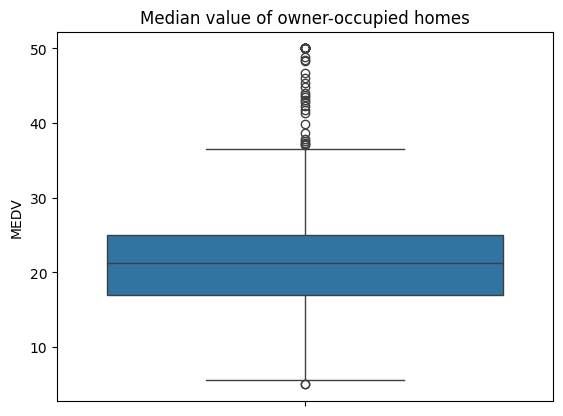

In [5]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.show()

Text(0.5, 1.0, 'homes near Charles River')

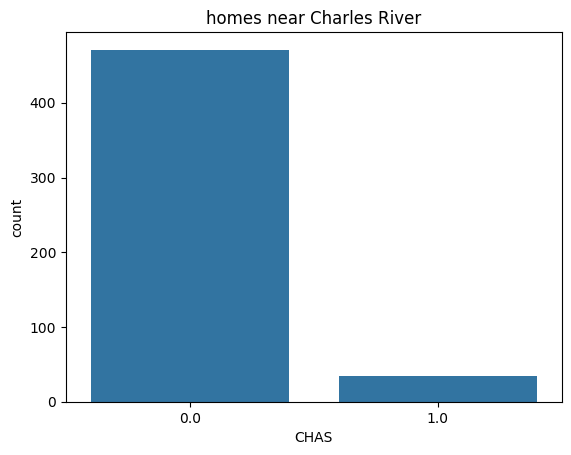

In [6]:
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
ax2.set_title('homes near Charles River')

In [7]:
group_a = boston_df['MEDV']
group_b = boston_df['CHAS'] 
t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 54.9210289745203
P-value: 1.4651540072350996e-305


Null hypothesis is that there is no difference between median home value and distance to charles river
with a p-value less than 0.05 we reject the null hypothesis and conclude there is a difference in median home value for house bound by the Charles River

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

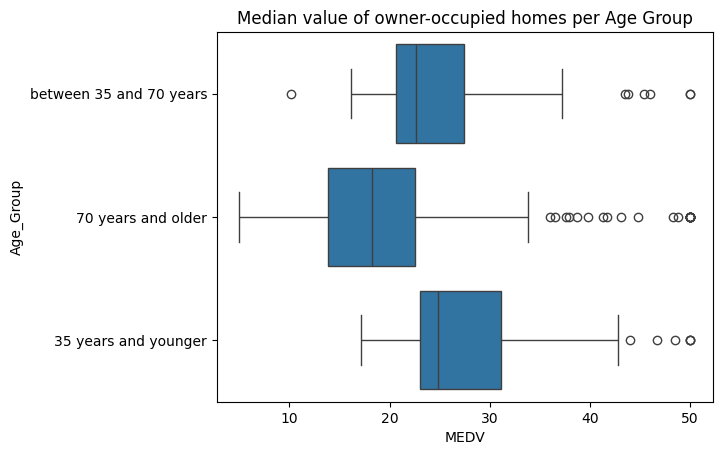

In [15]:
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')

In [31]:
Thirtyfive = boston_df.loc[boston_df['AGE'] == '35 years and younger']['MEDV']
toseventy = boston_df.loc[boston_df['AGE'] == 'Between 35 and 70 years']['MEDV']
seventy = boston_df.loc[boston_df['AGE'] == '70 years and older']['MEDV']

In [33]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Null hypothesis is there is no difference in median values of houses for each proportion of owner occupied units built prior to 1940 
with a p-value less than 0.05 we reject the null hypothesis and conclude there is a difference in median value of homes and age

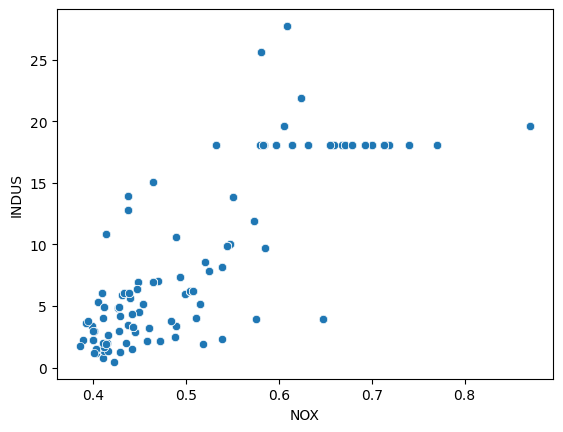

In [34]:
ax4 = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Null hypothesis is there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
with a positive pearson correlation of 0.7 and p value less than 0.05 we reject the null hypothesis
There is a strong positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

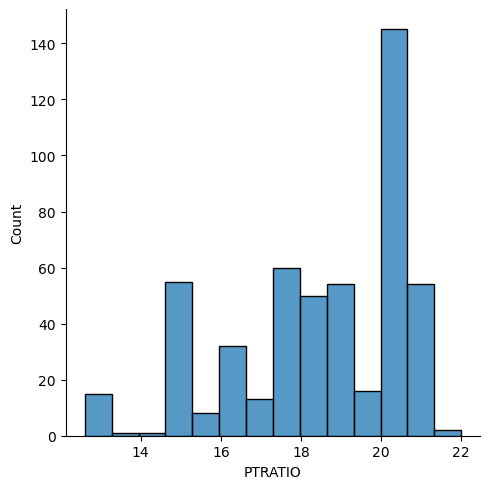

In [41]:
ax4 = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.show()

In [42]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        15:08:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null hypothesis is there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
with a 